In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_bpine_tfidf.csv")

In [3]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Pinene
0,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.324705,...,1,0,0,0,0,0,1,0,0,0.016667
1,9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0.016667
2,12,0.0,0.0,0.0,0.0,0.180779,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,1,0,0,0.016667
3,13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.016667
4,17,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42965,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.261458,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29996,42968,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29997,42972,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29998,42972,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333


In [4]:
df_mlp.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

In [5]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Pinene
0,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.324705,...,1,0,0,0,0,0,1,0,0,0.016667
1,9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0.016667
2,12,0.0,0.0,0.0,0.0,0.180779,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,1,0,0,0.016667
3,13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.016667
4,17,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,42965,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.261458,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29996,42968,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29997,42972,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333
29998,42972,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.003333


In [6]:
X = df_mlp.drop(['index', 'X..Beta-Pinene'], axis = 1)
y = df_mlp[['X..Beta-Pinene']]

<Axes: ylabel='Count'>

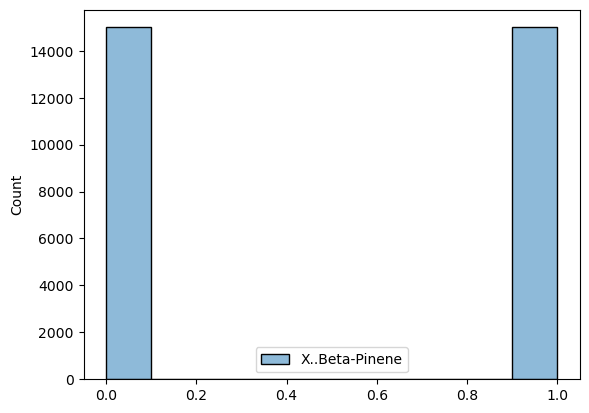

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
mean_absolute_error(y_val, y_pred_mlp)

0.04680531420390549

In [12]:
mean_squared_error(y_val, y_pred_mlp)

0.010681279623272895

In [13]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.10335027635798995

In [14]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.9895816136922723

In [15]:
#val
r2_score(y_val, y_pred_mlp)

0.9566548406122067

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([5.82934694e-05, 2.77200124e-04, 9.45452613e-04, 5.21583589e-05,
       5.11861802e-05, 7.88680923e-04, 1.16288343e-03, 3.13105575e-03,
       6.23551120e-05, 6.70226419e-04, 1.17967555e-04, 5.22886896e-04,
       1.73811864e-04, 1.03041368e-04, 1.15128646e-03, 3.87760005e-04,
       3.20296143e-04, 1.13391333e-03, 2.80480946e-05, 1.22539908e-04,
       1.61343363e-03, 5.15847159e-04, 8.94601329e-04, 5.64358572e-04,
       1.55004490e-03, 8.02742927e-05, 3.96343488e-04, 3.41234817e-04,
       2.93033386e-04, 7.85735138e-03, 1.32251728e-03, 1.29868665e-04,
       1.96204232e-03, 5.24225316e-04, 3.67296467e-04, 7.31464277e-04,
       7.93446531e-04, 1.17565407e-03, 1.81855048e-04, 4.16979784e-03,
       9.33515272e-04, 6.81855591e-04, 1.31176097e-04, 9.14592592e-04,
       7.30449841e-04, 1.45684405e-04, 1.02461616e-03, 1.38375124e-05,
       5.57875610e-04, 1.30995658e-04, 2.39254060e-04, 9.18005028e-04,
       2.83941369e-04, 6.30500197e-05, 6.90236174e-04, 1.62127050e-03,
      

In [19]:
selector.threshold_

0.0021321961620469083

In [20]:
mask = selector.get_support()

In [21]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False,

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_7,tfidf_29,tfidf_39,tfidf_84,tfidf_105,tfidf_119,tfidf_121,tfidf_125,tfidf_132,tfidf_145,...,tfidf_310,tfidf_312,tfidf_329,tfidf_333,tfidf_340,tfidf_344,tfidf_347,indica,blueberry,grape
0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.165248,0.0,0.0,0.151958,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0
1,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.208564,0.000000,0.077150,0.0,0.0,0.0,0.0,0,0,0
2,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.104649,0.000000,0.0,0.0,0.0,0.0,0,0,0
3,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.117085,0.0,0.0,0.0,0.0,0,0,0
4,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.178640,0.0,0.0,0.000000,...,0.000000,0.163848,0.120848,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.261458,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.179750,0.132576,0.0,0.0,0.0,0.0,1,0,0
29996,0.000000,0.0,0.0,0.46193,0.0,0.288772,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1,0,0
29997,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1,0,0
29998,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1,0,0


In [24]:
selected_X.columns.to_list()

['tfidf_7',
 'tfidf_29',
 'tfidf_39',
 'tfidf_84',
 'tfidf_105',
 'tfidf_119',
 'tfidf_121',
 'tfidf_125',
 'tfidf_132',
 'tfidf_145',
 'tfidf_168',
 'tfidf_175',
 'tfidf_181',
 'tfidf_193',
 'tfidf_197',
 'tfidf_198',
 'tfidf_205',
 'tfidf_224',
 'tfidf_244',
 'tfidf_254',
 'tfidf_260',
 'tfidf_264',
 'tfidf_265',
 'tfidf_270',
 'tfidf_285',
 'tfidf_302',
 'tfidf_309',
 'tfidf_310',
 'tfidf_312',
 'tfidf_329',
 'tfidf_333',
 'tfidf_340',
 'tfidf_344',
 'tfidf_347',
 'indica',
 'blueberry',
 'grape']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf_bpine.pkl")
joblib.dump(selector, "selector_mlp_tfidf_bpine.pkl")

['selector_mlp_tfidf_bpine.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.12674486155118134

In [30]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.7893792543395148

In [31]:
#val
r2_score(y_val, y_pred_mlpreg)

0.7792452782793278

Hyperparameter Tuning

In [32]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [33]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [34]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [35]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}

In [36]:
joblib.dump(rscv, "rscv_mlp_tfidf_bpine.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params_bpine.pkl")

['rscv_mlp_tfidf_best_params_bpine.pkl']

MLP fit (after hyperparameter tuning)

In [37]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter = 200, hidden_layer_sizes=(50,50,50), activation='relu', early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.07785922368494258

In [39]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.03524803197232597

In [40]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.18774459239170105

In [41]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.8704713573657974

In [42]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.8569554798776627

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [43]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [44]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf_bpine.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf_bpine.pkl")

['y_test_mlpreg_tfidf_bpine.pkl']

In [45]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.08216773937442666

In [46]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.03844857012197465

In [47]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.19608306944245504

In [48]:
r2_score(y_test, y_pred_mlpreg_test)

0.8439221198061464

Error analysis

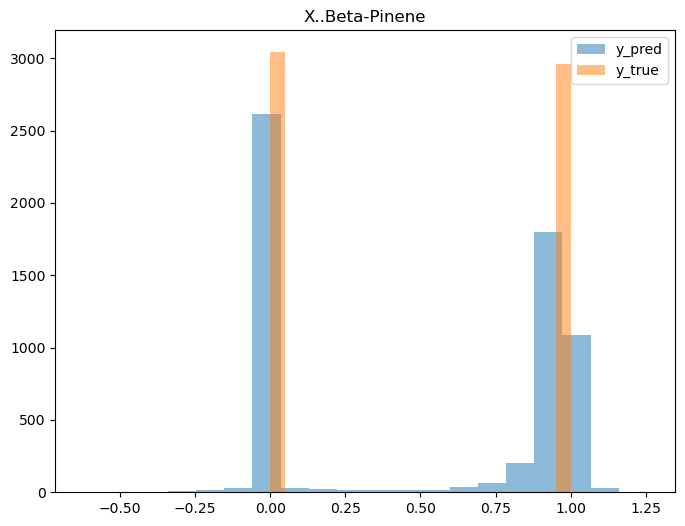

<Figure size 640x480 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Pinene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_tfidf_bpine.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.919
P-value: 0.000


<Axes: >

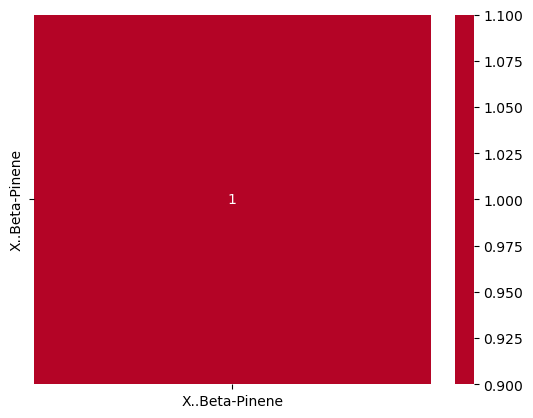

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)